# OpenCV Exercises

## Import libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Auxiliar function

In [ ]:
def show_image(image):
  plt.axis('off')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

## Exercise 1: Image transformations

In this exercise, you learn how to perform some of the basics image transformations in OpenCV.

### Part 1

(400, 800, 3)


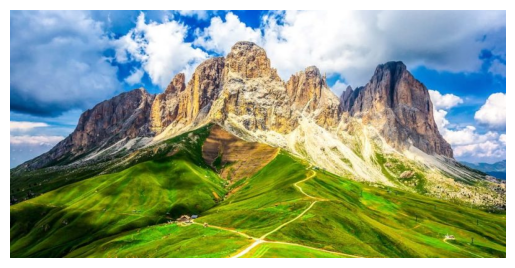

In [ ]:
# Read the mountain image
image = cv2.imread('mountain.jpg', cv2.IMREAD_COLOR)

# Print image shape
print(image.shape)

# Show image
show_image(image)

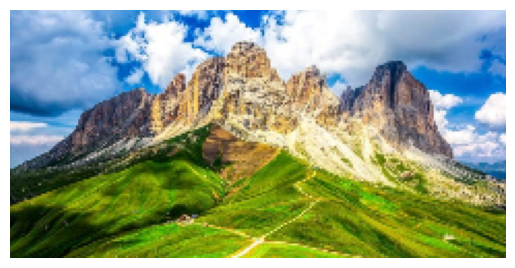

In [ ]:
# Resize the image to a smaller size
image_res = cv2.resize(image, (240,120))

# Print new image shape
# <COMPLETE>

# Show image
show_image(image_res)

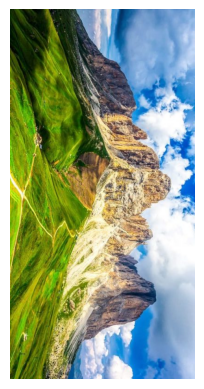

In [ ]:
# Rotate image 90º
image_rot = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Show image
show_image(image_rot)

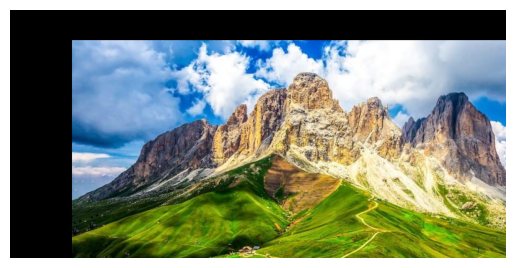

In [ ]:
# Translate image with cv2.warpAffine
image_transl = cv2.warpAffine(image, np.float32([[1,0,100],[0,1,50]]), (image.shape[1], image.shape[0]))

# Show image
show_image(image_transl)

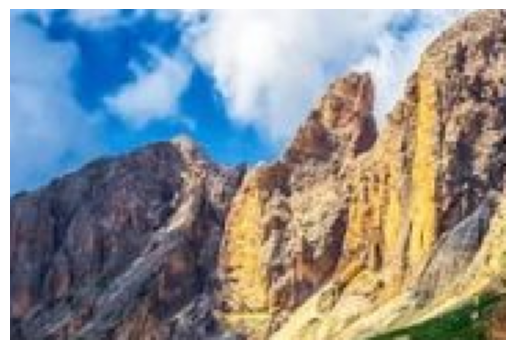

In [ ]:
# Crop one part of the image
cropped = image[80:200, 150:330]

# Show image
show_image(cropped)

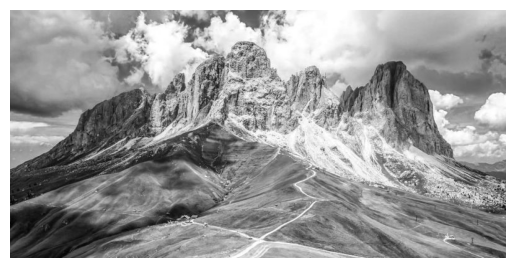

In [ ]:
# Get R,G,B channels and show one of them
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

# Show one channel (e.g. the Red channel)
show_image(G)  # Displays the red channel in grayscale

# <COMPLETE>


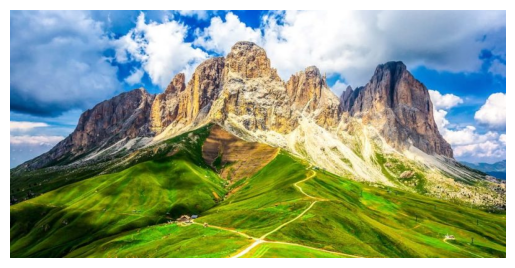

In [ ]:

# Merge the channels in the RGB order and show the image
merged_image = cv2.merge([B, G, R])

#Show image
plt.axis('off')
plt.imshow(merged_image)
plt.show()


Text(0.5, 1.0, 'Color Histogram')

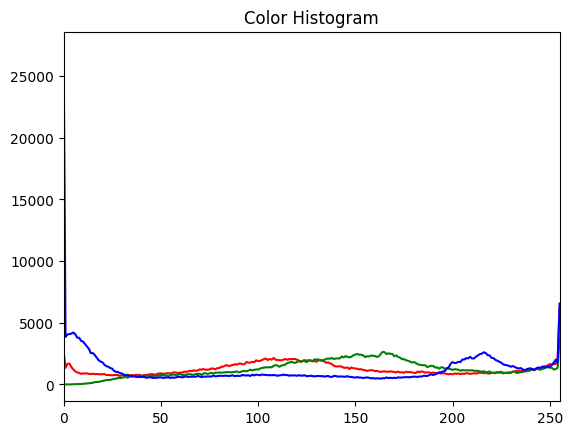

In [ ]:
# Get histogram per colors and show
red_hist = cv2.calcHist([image], [2], None, [256], [0, 256])
green_hist = cv2.calcHist([image], [1], None, [256], [0, 256])
blue_hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Show histogram
plt.plot(red_hist, color='r')
plt.plot(green_hist, color='g')
plt.plot(blue_hist, color='b')

plt.xlim([0, 255])
plt.title('Color Histogram')

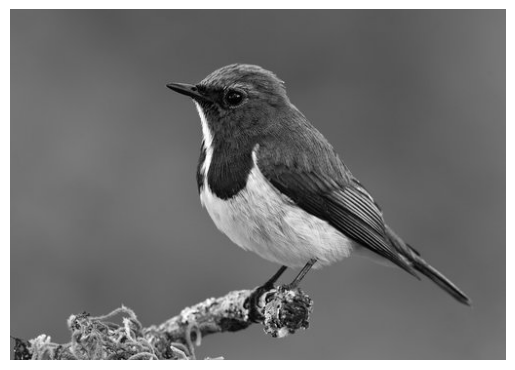

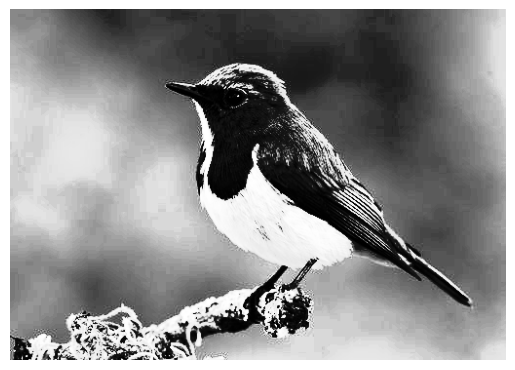

In [ ]:
# Perform histogram equalization over grayscale image of the mountain
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_eq = cv2.equalizeHist(image_gray)

# Show image
show_image(image_gray)
show_image(image_eq)

### Part 2


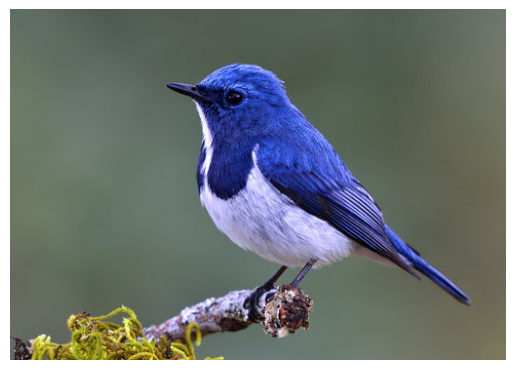

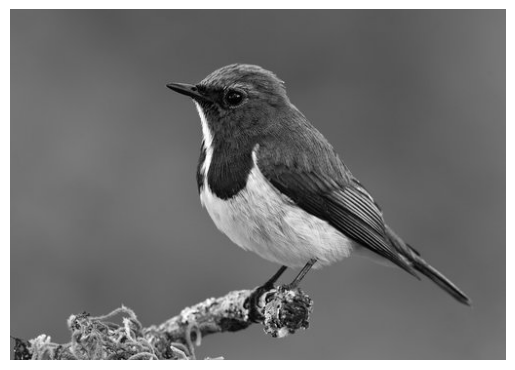

In [ ]:
# Read the bird image and transform to gray
image = cv2.imread('bird.jpg', cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show images
show_image(image)
show_image(image_gray)

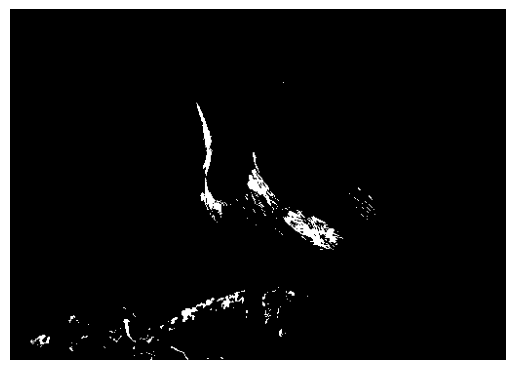

In [ ]:
# Apply a threshold to the gray image
thresh = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY)[1]

# Show image
show_image(thresh)

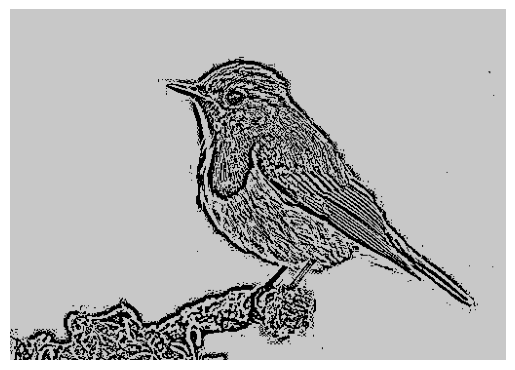

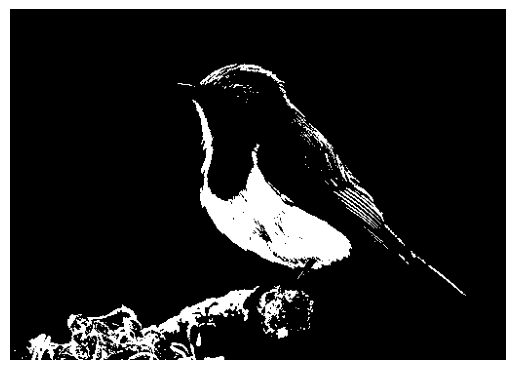

In [ ]:
# Apply an adaptive threshold to the gray image
thresh_adap = cv2.adaptiveThreshold(image_gray, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


_, thresh_global = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)


# Show images
show_image(thresh_adap)       # adaptive threshold result
show_image(thresh_global)     # optional global threshold result



**What does the threshold? What does the adaptive threshold? What can each one of them be used for?**

A threshold converts each pixel to either black or white (0 or 255) depending on whether its intensity is below or above a certain cutoff value.

An adaptive threshold computes a local threshold for each small region (block) of the image. This helps handle uneven lighting or shadows, since each region gets its own threshold rather than using one global intensity value for the entire image.



Answer here

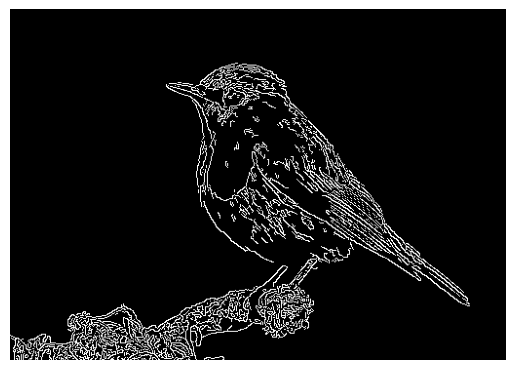

In [ ]:
# Get edges of the image
image_edges = cv2.Canny(image_gray, 100, 200)



# Show image
show_image(image_edges)

**What can we use for the edge detection in images?**

Sudden changes in pixel intensity characterize edges. We need to look for such changes in the neighboring pixels to detect edges.

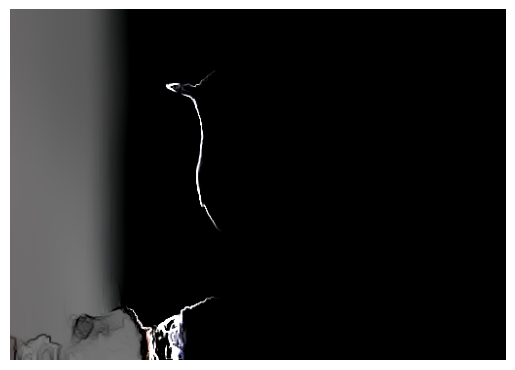

In [ ]:
# Perform stylization on the image
cartoon = cv2.stylization(
    image_gray,
    sigma_s=60,   # Spatial smoothing (0–200)
    sigma_r=0.6   # Range between 0–1 for color/tonal smoothing
)

# Show image
show_image(cartoon)

## Exercise 2: Color detection for ball counter

### Color detection

In this exercise you will learn to detect a color and perform some image operations to get better results.

Use the [HSV TEMPLATE](https://static.packt-cdn.com/products/9781789537147/graphics/assets/9f6c1be4-f654-4d28-b476-a2e327920de6.png) for the color detection.


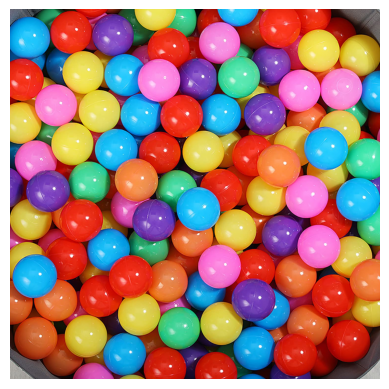

In [ ]:
# Load the colorballs image
image = cv2.imread('colorballs.jpg', cv2.IMREAD_COLOR)

# Show image
show_image(image)

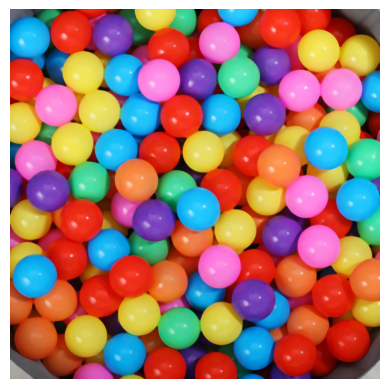

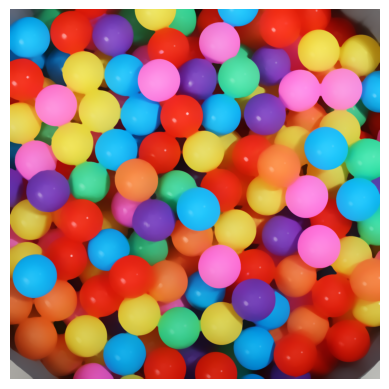

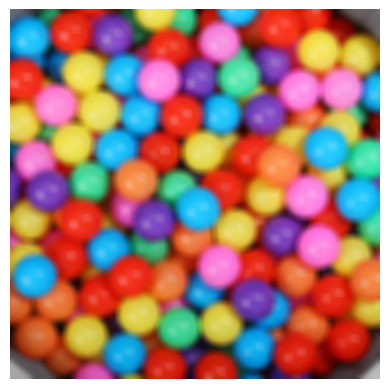

In [ ]:
# Apply a median filter to the image
image_median = cv2.medianBlur(image, 15)

# Apply a bilateral filter
image_bil = cv2.bilateralFilter(image_median, 80, 75, 75)

# Apply a gaussian filter
image_gauss = cv2.GaussianBlur(image, (35,35),35.5)

# Show image
show_image(image_median)
show_image(image_bil)
show_image(image_gauss)

**What are the purposes and differences for each one of the filters?**

Gaussian filter applies a weighted blur over the entire image but does not specifically preserve edges. A median filter replaces each pixel with the median of its neighborhood to remove outliers, while a bilateral filter smooths color regions and preserves edges by considering both spatial and intensity distances.

**What happens when the values for the median filter are too high?**

If the median filter’s kernel size is set too high, the image can become excessively blurred and lose important details. This can also oversimplify edges, resulting in a less natural or uniform look.Answer here

**We want to get the colours as pure as possible and avoid the brights. What filter would you use for this task? Why?**

A bilateral filter is ideal because it smooths regions of similar color while preserving sharp edges. It helps reduce bright outliers and keeps color areas clean without heavy blurring.Answer here

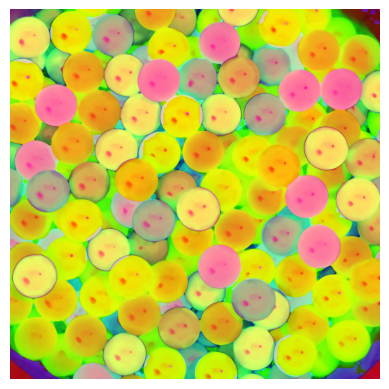

In [ ]:
# Select the chosen filtered image
image_blur = image_median

# Convert the image_blur to HSV
hsv_image = cv2.cvtColor(image_blur, cv2.COLOR_BGR2HSV)

# Show image
show_image(hsv_image)

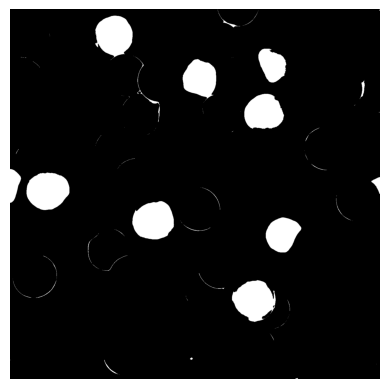

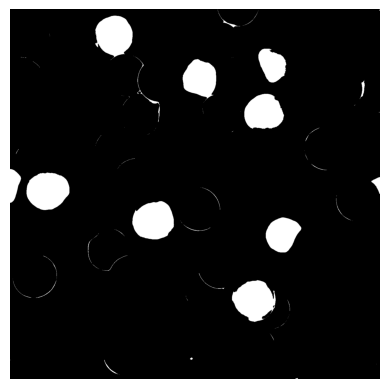

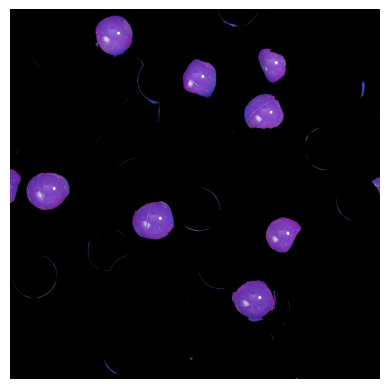

In [ ]:
# Detect the PURPLE color
lower_range = ( 110, 0, 140)
upper_range = (140, 240, 250)

# Get color mask
mask = cv2.inRange(hsv_image, lower_range, upper_range)

# Show mask
show_image(mask)

# Get mask over image (bitwise_and)
color_image = cv2.bitwise_and(image, image, mask=mask)

# Show masked color
show_image(mask)

# Show mask over image
show_image(color_image)

Check out the next page for [morphological operations](https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html). We want to delete the detected little pixels that dont belong to purple balls or aren't big enough. However, we want the bigger balls to not lose part of its area.

Based on this:

- Choose the morphological operation that can eliminate this outside pixels and maintain the area of the bigger objects.

- Select the kernel shape according to the shape that we are filtering.



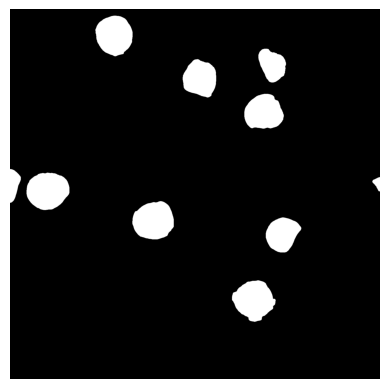

In [ ]:
# Apply the chosen morphological operation to the mask so the outside pixels dissapear
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
new_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Show morphological operation
show_image(new_mask)

**If you have holes inside the circles, what morphological operation would you perform to convert this holes to white?**

Answer here

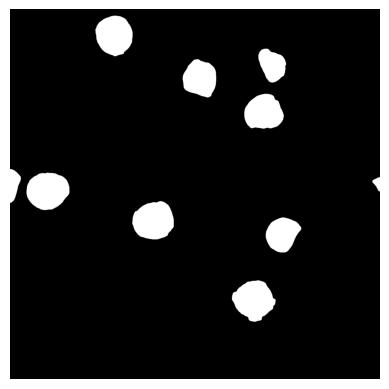

In [ ]:
# Complete ONLY IF NEEDED: fill holes inside the circles
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
new_mask = cv2.morphologyEx(new_mask, cv2.MORPH_CLOSE, kernel)

# Show morphological operation
show_image(new_mask)

### Ball counter

Now that we have a clean mask, we want to detect and count the detected purple balls. However, we will only take into account the purple balls that are bigger than a certain area.

For that purpose, we need to detect the edges of the mask, get the contours and filter the areas. Then we will mark the detected balls and count them with a number in the image.

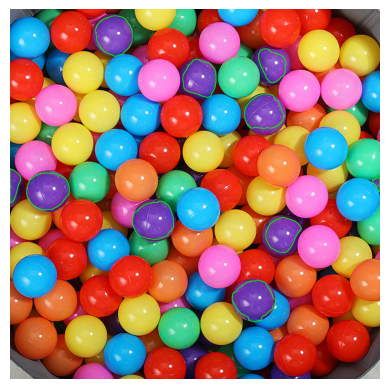

In [ ]:
# Find the contours of the image using the new_mask
contours, _ = cv2.findContours(new_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image
image_all_contours = image.copy()

# Draw the contours on image_all_contours
image_all_contours = image.copy()
cv2.drawContours(image_all_contours, contours, -1, (0, 255, 0), 2)

# Show image
show_image(image_all_contours)

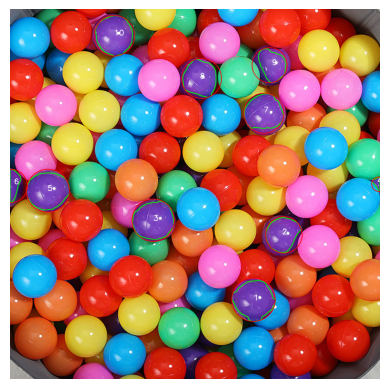

In [ ]:
# Filter the contours with a small area

image_contours = image.copy() # Copy of the image
area_min = 500 # Adjust minimum to your image
counter_balls = 0

# For each contour
for contour in contours:
  area = cv2.contourArea(contour)



  # If area is bigger than area_min
  if area > area_min:

    # Draw the contour on image_contours
    cv2.drawContours(image_contours, [contour], -1, (0, 255, 0), 2)
    # print("Actual area: ", area)

    # Increase the variable counter_balls
    counter_balls += 1

    # Get center of the contour using cv2.moments
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0


    # Write the number of the detected ball in the center calculated
    cv2.putText(
            image_contours, str(counter_balls),
            (cx, cy),
            cv2.FONT_HERSHEY_SIMPLEX,
            1, (255, 255, 255), 2
        )

    # Draw the minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(contour)
    cv2.circle(image_contours, (int(x), int(y)), int(radius), (0, 0, 255), 2)


  # else:
    # print("Area skipped: ", area)


# Show image with contours
show_image(image_contours)

## Exercise 3: Face and eyes detection with Haar Cascade

In this exercise we will use the Haar Cascade model to detect faces.

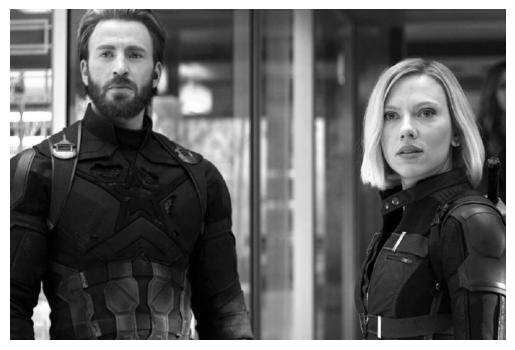

In [ ]:
# Load the avengers image
image = cv2.imread('avengers.jpg', cv2.IMREAD_COLOR)

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
show_image(image_gray)

In [ ]:
# Load the cascade models
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
eyes_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

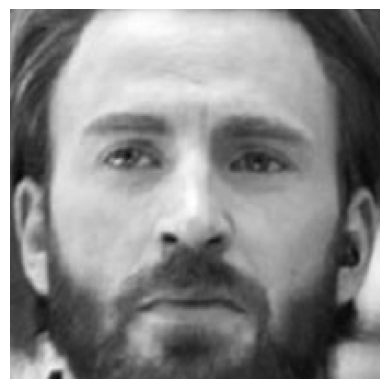

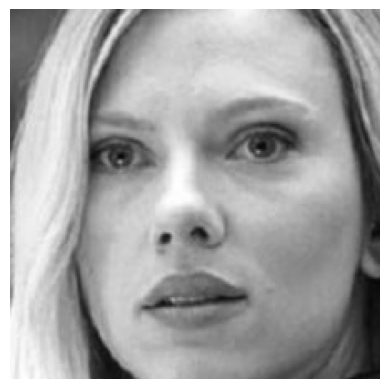

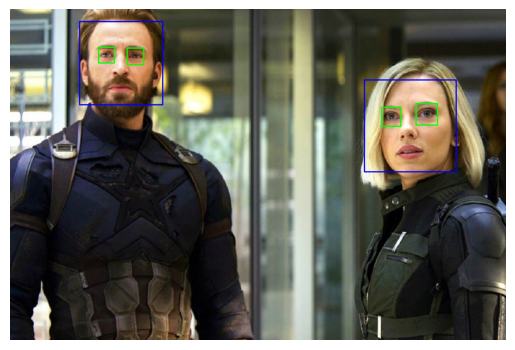

In [ ]:
# Function to detect faces and eyes

#def detect_faces_and_eyes(img, img_gray):

  # Detect the faces with face_cascade
faces = face_cascade.detectMultiScale(image_gray, 1.1, 4)

  # For each detected face
for (x,y,w,h) in faces:


      # Get center of the face
      center = (x + w//2, y + h//2)

      # Draw a rectangle around the face
      cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

      # Crop the image_gray to get the face roi
      face_roi = image_gray[y:y+h, x:x+w]

      # Show face roi
      show_image(face_roi)

      # Detect eyes in face_roi with eyes_cascade
      eyes = eyes_cascade.detectMultiScale(face_roi, 1.1, 4)

      # For each eye detected
      for (x2,y2,w2,h2) in eyes:
          # Draw a rectangle for each eye detection
          cv2.rectangle(image, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (0, 255, 0), 2)


show_image(image)

**In which cases do you think it performs best? What happens if you use the complete image for eye detection instead of the face ROI?**


The face-and-eye Haar cascades generally perform best on images with frontal or near-frontal faces under reasonable lighting conditions and minimal occlusions. In such cases, the trained classifier can easily match known face/eye features without encountering large pose or illumination variations.

If you apply eye detection over the entire image instead of just the face region of interest, you typically get more false positives (e.g., patterns in the background that resemble eyes) and it’s also less efficient computationally because you are searching over a much larger area.
